# 3 Point geospatial data

In [2]:
import pandas as pd
import geopandas as gpd

import matplotlib # base python plotting library
import matplotlib.pyplot as plt # submodule of matplotlib

# To display plots, maps, charts etc in the notebook
%matplotlib inline  

In [11]:
alameda_parcels_gdf = gpd.read_file("../qgis_workshop_data/parcel_pts_rand30pct.geojson")

In [12]:
alameda_parcels_gdf

,APN,APN2,STATE,COUNTY,FIPS,SIT_HSE_NU,SIT_DIR,SIT_STR_NA,SIT_STR_SF,SIT_FULL_S,SIT_CITY,SIT_STATE,SIT_ZIP,SIT_ZIP4,LAND_VALUE,IMPR_VALUE,TOT_VALUE,totvalue2,geometry
0,1-111-1,001 011100100,CA,Alameda,06001,229,None,Brush,St,229 BRUSH ST,Oakland,CA,94607,3009,22057,38064,60121,60121,POINT (-122.28340 37.79949)
1,1-113-2-2,001 011300202,CA,Alameda,06001,400,None,Market,St,400 MARKET ST,Oakland,CA,94607,3034,375012,349588,724600,724600,POINT (-122.28308 37.80071)
2,1-115-20,001 011502000,CA,Alameda,06001,724,None,4th,St,724 4TH ST,Oakland,CA,94607,3018,20825,9193,30018,30018,POINT (-122.28185 37.80021)
3,1-115-26,001 011502600,CA,Alameda,06001,410,None,Brush,St,410 BRUSH ST,Oakland,CA,94607,3014,10484,0,10484,10484,POINT (-122.28225 37.80034)
4,1-115-28,001 011502800,CA,Alameda,06001,725,None,4th,St,725 4TH ST,Oakland,CA,94607,3017,38865,298480,337345,337345,POINT (-122.28227 37.79983)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34626,9-746-16,009 074601600,CA,Alameda,06001,467,None,34th,St,467 34TH ST,Oakland,CA,94609,2833,105817,94935,204370,204370,POINT (-122.26493 37.82184)
34627,9-746-27,009 074602700,CA,Alameda,06001,450,None,30th,St,450 30TH ST,Oakland,CA,94609,3302,749959,1121120,1871079,1871079,POINT (-122.26650 37.81966)
34628,9-746-29,009 074602900,CA,Alameda,06001,418,None,30th,St,418 30TH ST,Oakland,CA,94609,3309,653683,879728,1533411,1533411,POINT (-122.26507 37.81932)
34629,9-746-38,009 074603800,CA,Alameda,06001,365,None,Hawthorne,Ave,365 HAWTHORNE AVE,Oakland,CA,94609,3107,629529,4766769,5396298,5396298,POINT (-122.26333 37.82060)


<div style="display:inline-block;vertical-align:top;">
    <img src="../../assets/images/light_bulb.png" width="30" align=left > 
</div>  
<div style="display:inline-block;">


#### Question
</div>

What kind of dataframe is this?
1. Geospatial data with polygon geometries
2. Geospatial data with point geoemetries
3. Non-geospagial data

In [13]:
alameda_parcels_gdf['geometry'].type.unique()

array(['Point'], dtype=object)

In [14]:
alameda_parcels_gdf.columns

Index(['APN', 'APN2', 'STATE', 'COUNTY', 'FIPS', 'SIT_HSE_NU', 'SIT_DIR',
       'SIT_STR_NA', 'SIT_STR_SF', 'SIT_FULL_S', 'SIT_CITY', 'SIT_STATE',
       'SIT_ZIP', 'SIT_ZIP4', 'LAND_VALUE', 'IMPR_VALUE', 'TOT_VALUE',
       'totvalue2', 'geometry'],
      dtype='object')

Here's what each variable means:
- `APN` and `APN2` are different forms of the assessor's parcel number (APN). It is a number assigned to parcels of  property by the jurisdiction's tax assessor.


- `STATE` and `COUNTY` are pretty straight forward descriptions, as these columns contain strings with the state (2 letter abbreviation) and county that the parcel is in.


- `FIPS` stands for Federal Information Processing Standards and should be familiar because we have been using them to identify records in the ACS dataset. The FIPS code in this dataframe only contains the 5 number code for the state and county.
    - e.g. `06001` stands for `06`=California and `001`=Alameda County
    
    
- All of the fields that begin with `SIT_` describe the specific address for the parcel. `SIT_FULL_S`, `SIT_CITY`, `SIT_STATE`, and `SIT_ZIP` together represent the full address for the parcel. The other fields are either subsets of that address (`SIT_HSE_NU`, `SIT_DIR`, `SIT_STR_NA`, `SIT_STR_SF`) or contain additional location descriptions (`SIT_ZIP4`, `SIT_POST`).


- `LAND_VALUE` is the value of the parcel in 2016 USD
- `IMPR_VALUE` is the value of the market improvement value on the parcel in 2016 USD
- `TOT_VALUE` is the sum of `LAND_VALUE` and `IMPR_VALUE`


- `geometry` is a column associated with geospatial data. Do not delete this column. We will discuss details on this column in more detail in subsequent notebooks.



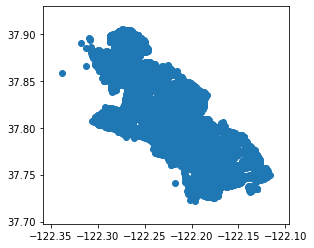

In [16]:
alameda_parcels_gdf.plot()

### Challenge
Subset the parcels data to be for Berkeley and plot it